# Import

In [59]:
#here we import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
#here we load the data set
df = pd.read_csv("seismic-bumps.csv")

In [61]:
#We show the dataset
df

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,b,a,W,81410,785,432,151,b,0,0,0,0,0,0,0,0,0,0,0
2580,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0,0,0,0,0
2581,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0,0,0,0,0
2582,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0,0,0,0,0


In [62]:
#An array of the column names
df.columns

Index(['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy',
       'gdpuls', 'hazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy', 'maxenergy',
       'class'],
      dtype='object')

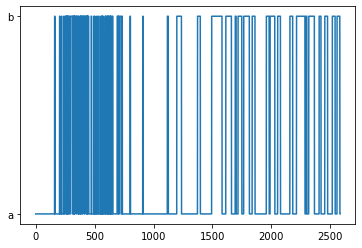

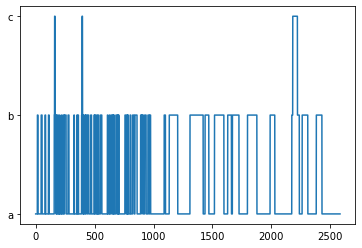

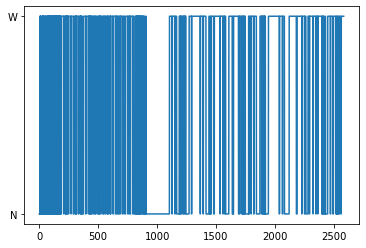

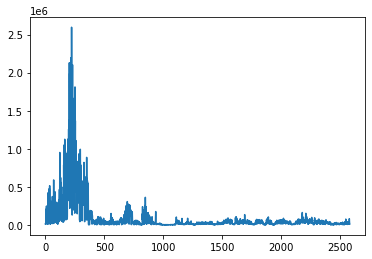

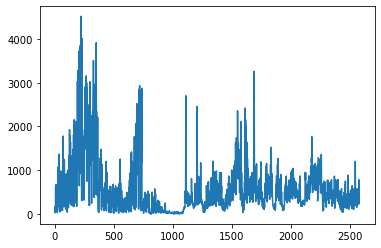

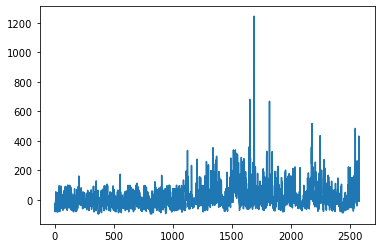

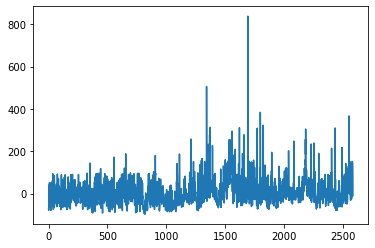

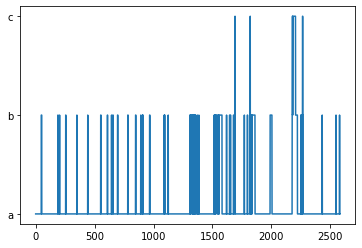

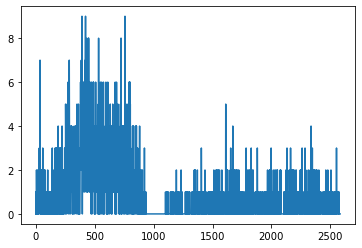

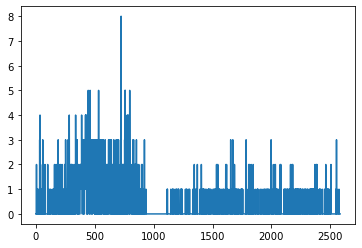

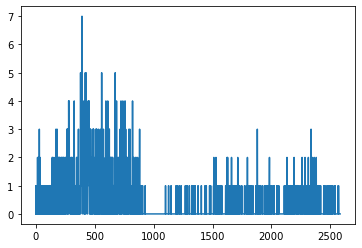

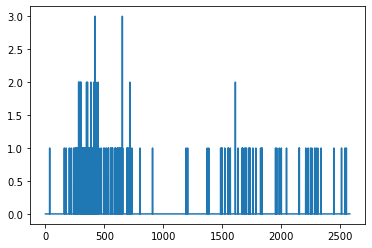

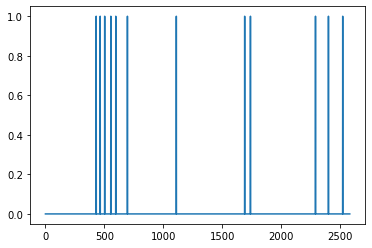

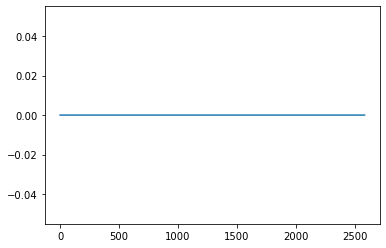

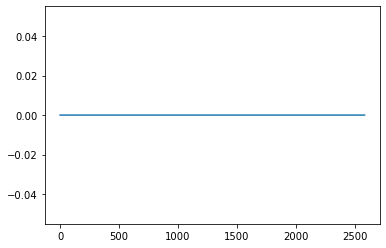

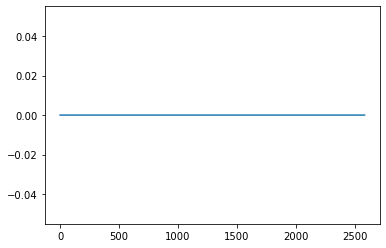

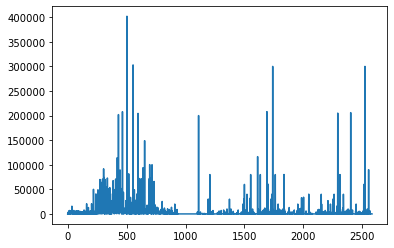

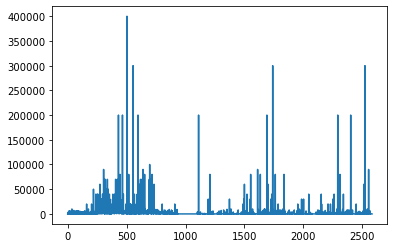

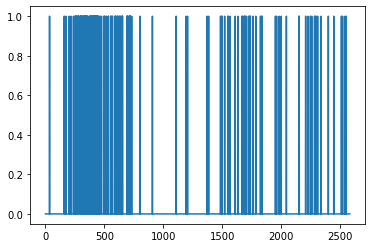

In [63]:
#we make a plot for every columns to visualize the data and see possible correlations
for column in df.head():
    plt.plot(df[column])
    plt.show()

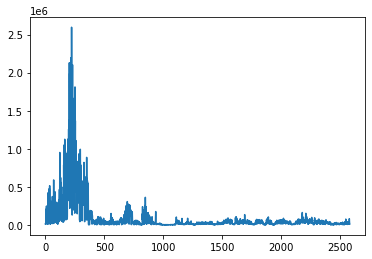

In [64]:
plt.plot(df["genergy"])
plt.show()

# Categorical variables

Text(0.5, 0, 'Seismic')

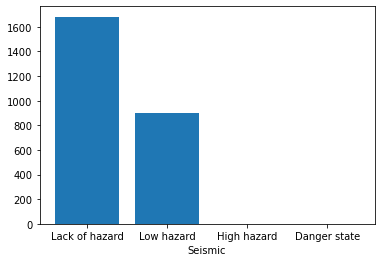

In [65]:
#Making bar plots for categorical variables (seismic, seismoacoustic, shift, ghazard)

plt.bar(["Lack of hazard","Low hazard","High hazard","Danger state"],[(df["seismic"]=='a').sum(),(df["seismic"]=='b').sum(),(df["seismic"]=='c').sum(),(df["seismic"]=='d').sum()])
plt.xlabel("Seismic")

Text(0.5, 0, 'Seismoacoustic')

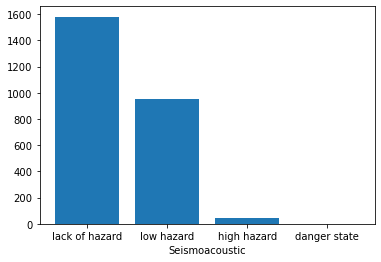

In [66]:
plt.bar(["lack of hazard","low hazard","high hazard","danger state"],[(df["seismoacoustic"]=='a').sum(),(df["seismoacoustic"]=='b').sum(),(df["seismoacoustic"]=='c').sum(),(df["seismoacoustic"]=='d').sum()])
plt.xlabel("Seismoacoustic")

Text(0.5, 0, 'Shift')

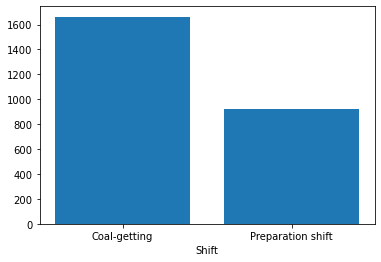

In [67]:
plt.bar(["Coal-getting","Preparation shift"],[(df["shift"]=='W').sum(),(df["shift"]=='N').sum()])
plt.xlabel("Shift")

Text(0.5, 0, 'Hazard')

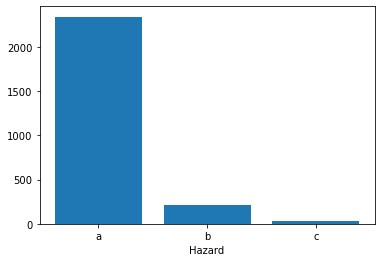

In [68]:
plt.bar(["a","b","c"],[(df["hazard"]=='a').sum(),(df["hazard"]=='b').sum(),(df["hazard"]=='c').sum()])
plt.xlabel("Hazard")

# Numerical variables

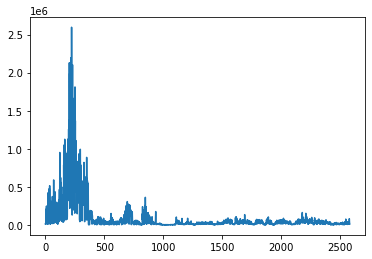

In [69]:
# making histogram plots for numerical variables (genergy, gpuls, gdenergy, gdpuls, energy, maxenergy)
plt.plot(df["genergy"])
plt.show()

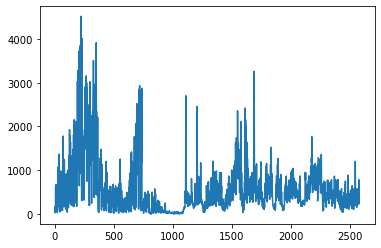

In [70]:
plt.plot(df["gpuls"])
plt.show()

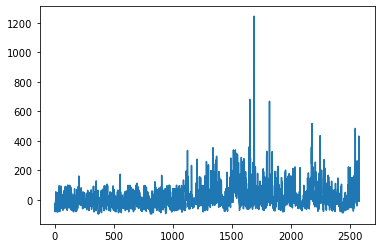

In [71]:
plt.plot(df["gdenergy"])
plt.show()

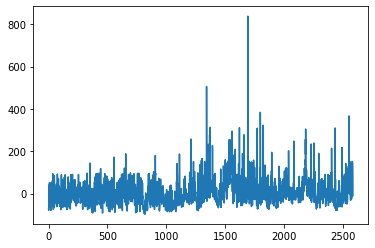

In [72]:
plt.plot(df["gdpuls"])
plt.show()

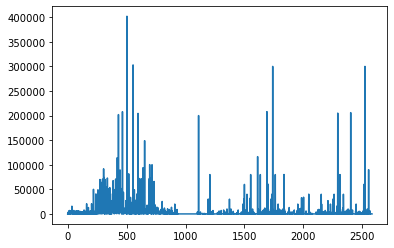

In [73]:
plt.plot(df["energy"])
plt.show()

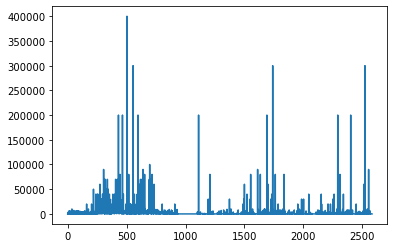

In [74]:
plt.plot(df["maxenergy"])
plt.show()

# Discrete variables

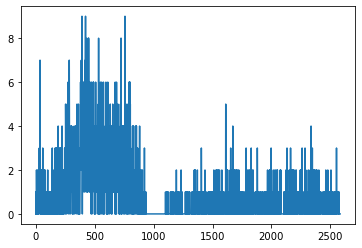

In [77]:
# making plots for discrete variables (nbumps, nbumps2, nbumps3, nbumps4, nbumps5, nbumps6, nbumps7, nbumps89)
plt.plot(df["nbumps"])
plt.show()

Text(0.5, 0, 'nbumps')

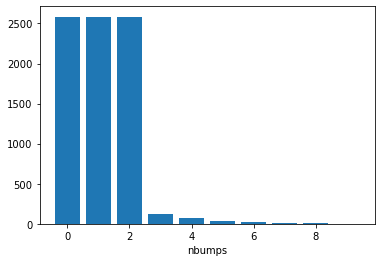

In [85]:
plt.bar(list(range(10)),[(df["nbumps"]==0).count(),(df["nbumps"]==1).count(),(df["nbumps"]==2).count(),(df["nbumps"]==3).sum(),(df["nbumps"]==4).sum(),(df["nbumps"]==5).sum(),(df["nbumps"]==6).sum(),(df["nbumps"]==7).sum(),(df["nbumps"]==8).sum(),(df["nbumps"]==9).sum()])
plt.xlabel("nbumps")

In [36]:
# we display descriptive stats for all columns
df.describe()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000,2584.000000
mean,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619,0.065789
std,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882,0.247962
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000,0.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000,1.000000
